<a href="https://colab.research.google.com/github/SergeyShchus/Automatic_GIS/blob/master/Notebook/Geopandas/Static_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
# Install OpticalRS. This also installs GeoPandas because GeoPandas is a dependency of OpticalRS
!apt-get install software-properties-common python-software-properties > /dev/null
!add-apt-repository ppa:ubuntugis/ppa -y > /dev/null
!apt-get update > /dev/null
!apt-get install -y --fix-missing python-gdal gdal-bin libgdal-dev > /dev/null
!pip2 install OpticalRS > /dev/null

! pip install geopandas
!pip install mapclassify
!pip install contextily

import contextily as ctx
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import mapclassify

from google.colab import drive
drive.mount('/content/gdrive')

E: Package 'python-software-properties' has no installation candidate
Extracting templates from packages: 100%
     |████████████████████████████████| 1.0MB 6.7MB/s 
     |████████████████████████████████| 15.4MB 284kB/s 
     |████████████████████████████████| 6.6MB 35.3MB/s 
Mounted at /content/gdrive


In [4]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt

# Filepaths
grid_fp = "/content/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = "/content/roads.shp"
metro_fp = "/content/metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [5]:
# Check the crs of each layer
print(roads.crs)
print(metro.crs)
print(grid.crs)

epsg:2392
epsg:2392
epsg:3067


In [6]:
# Check CRS names
print("Roads crs:", CRS(roads.crs).name)
print("Metro crs:", CRS(metro.crs).name)
print("Grid crs: ",CRS(grid.crs).name)

Roads crs: KKJ / Finland zone 2
Metro crs: KKJ / Finland zone 2
Grid crs:  ETRS89 / TM35FIN(E,N)


In [7]:
# Reproject geometries to ETRS89 / TM35FIN based on the grid crs:
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)

In [8]:
roads.crs == metro.crs == grid.crs

True

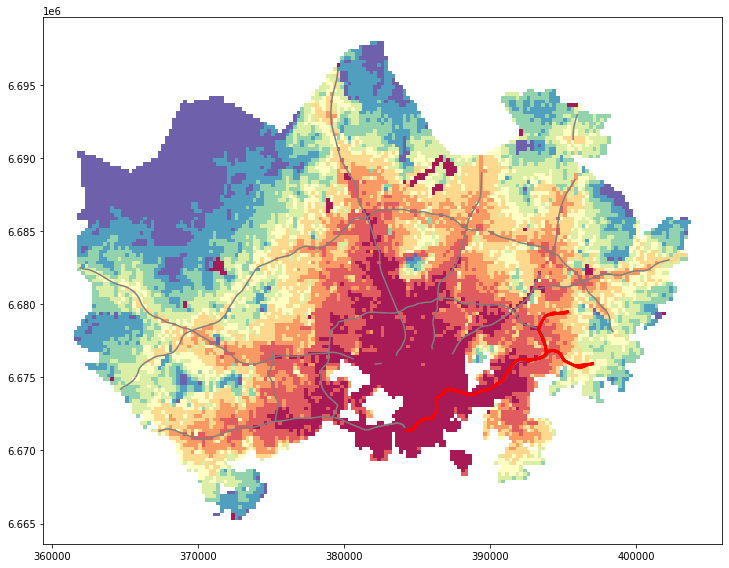

In [26]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(12,8))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, column="car_r_t", linewidth=0.03, cmap="Spectral", scheme="quantiles", k=9, alpha=0.9)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=ax, color="grey", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=ax, color="red", linewidth=2.5)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 600 dpi
outfp = "static_map_1.jpg"
plt.savefig(outfp, dpi=600)

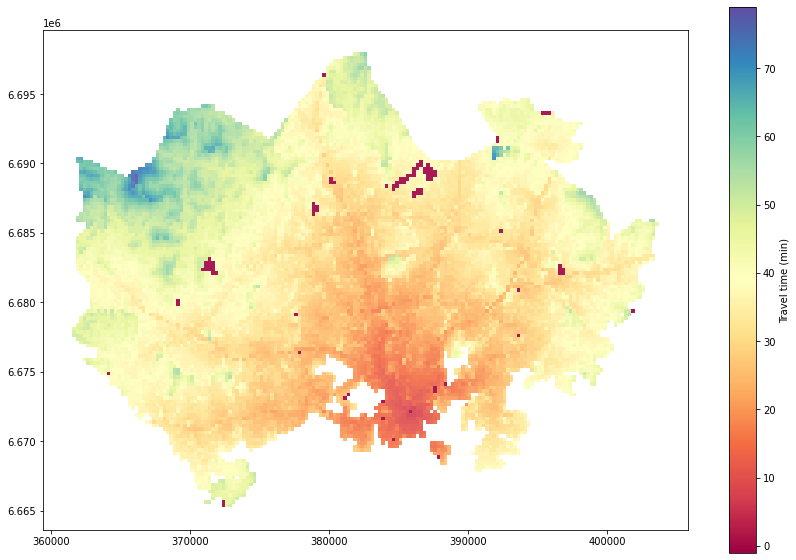

In [27]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(12,8))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, column="car_r_t", 
          linewidth=0.03, 
          cmap="Spectral", 
          alpha=0.9, 
          legend=True, 
          legend_kwds={'label': "Travel time (min)"}
         )

#ax.get_legend().set_bbox_to_anchor(8)
#ax.get_legend().set_title("Legend title")

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 600 dpi
outfp = "static_map_2.jpg"
plt.savefig(outfp, dpi=600)

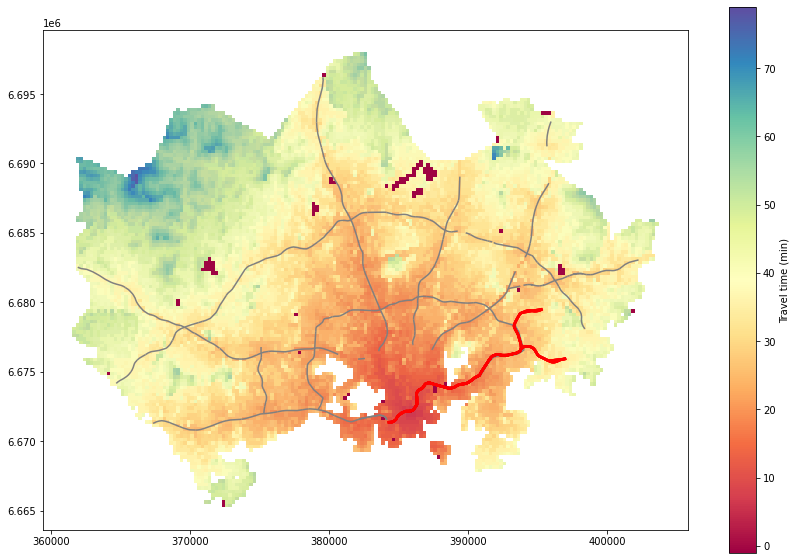

In [28]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(12,8))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, column="car_r_t", linewidth=0.03, cmap="Spectral", scheme="quantiles", k=9, alpha=0.9)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=ax, color="grey", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=ax, color="red", linewidth=2.5)

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, column="car_r_t", 
          linewidth=0.03, 
          cmap="Spectral", 
          alpha=0.9, 
          legend=True, 
          legend_kwds={'label': "Travel time (min)"}
         )

#ax.get_legend().set_bbox_to_anchor(8)
#ax.get_legend().set_title("Legend title")

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 600 dpi
outfp = "static_map_3.jpg"
plt.savefig(outfp, dpi=600)

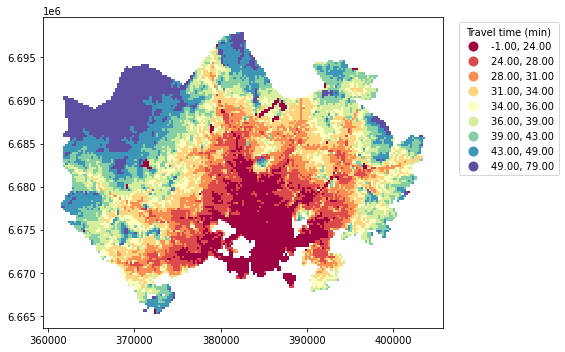

In [29]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(10,5))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, 
          column="car_r_t", 
          linewidth=0.03, 
          cmap="Spectral", 
          scheme="quantiles", 
          k=9, 
          legend=True, 
          )

# Re-position the legend and set a title
ax.get_legend().set_bbox_to_anchor((1.3,1))
ax.get_legend().set_title("Travel time (min)")

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 600 dpi
outfp = "static_map_4.jpg"
plt.savefig(outfp, dpi=600)

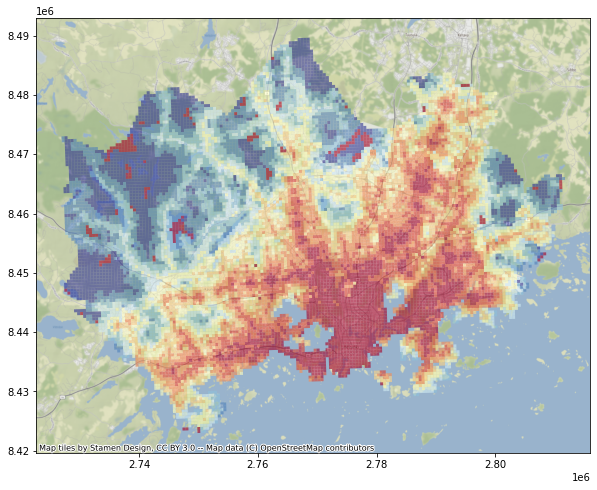

In [30]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=9, alpha=0.6)

# Add basemap 
ctx.add_basemap(ax)

# Save the figure as png file with resolution of 600 dpi
outfp = "static_map_5.jpg"
plt.savefig(outfp, dpi=600)

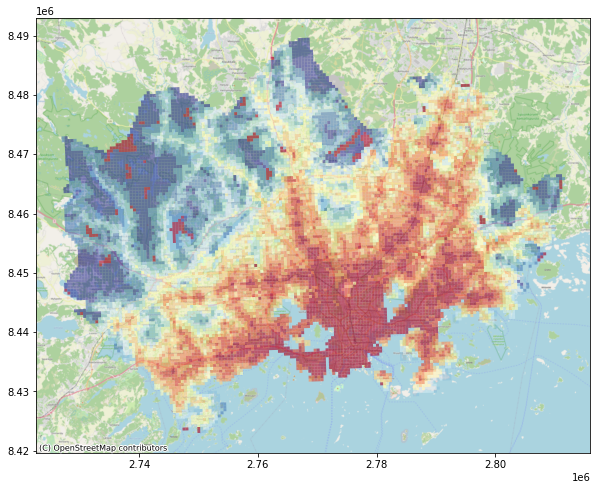

In [31]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=9, alpha=0.6)

# Add basemap with basic OpenStreetMap visualization
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Save the figure as png file with resolution of 600 dpi
outfp = "static_map_6.jpg"
plt.savefig(outfp, dpi=600)

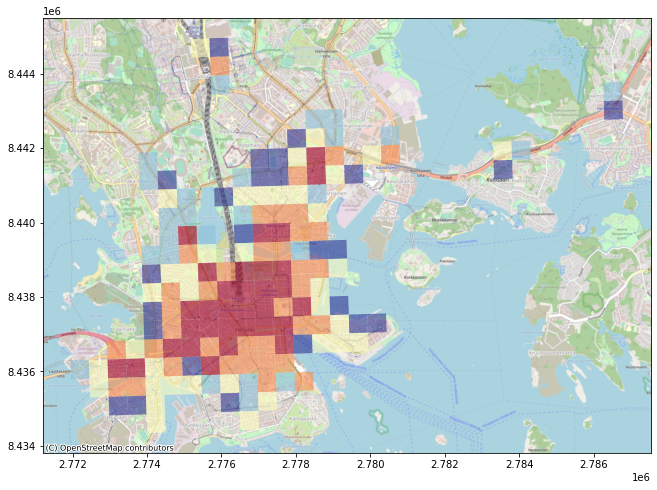

In [32]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Subset the data to seel only grid squares near the destination
subset = data.loc[(data['pt_r_t']>=0) & (data['pt_r_t']<=15)]

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)

# Add basemap with `OSM_A` style
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Save the figure as png file with resolution of 600 dpi
outfp = "static_map_7.jpg"
plt.savefig(outfp, dpi=600)

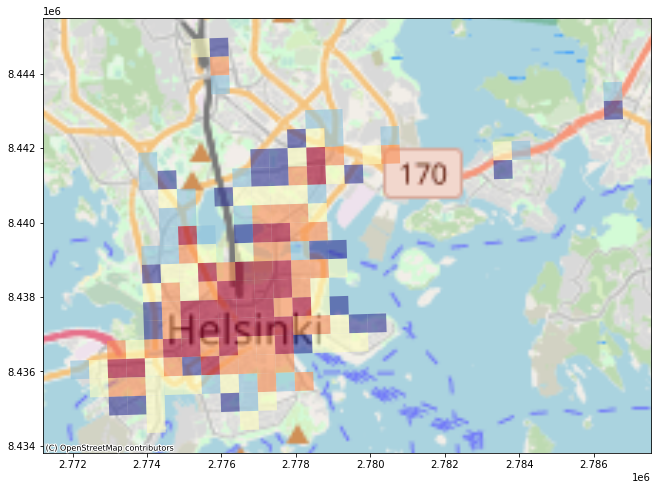

In [33]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)

# Add basemap with `OSM_A` style using zoom level of 11
ctx.add_basemap(ax, zoom=11, source=ctx.providers.OpenStreetMap.Mapnik)

# Save the figure as png file with resolution of 600 dpi
outfp = "static_map_8.jpg"
plt.savefig(outfp, dpi=600)

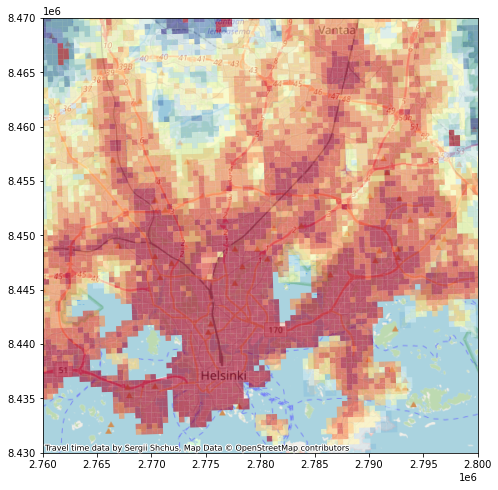

In [34]:
credits = "Travel time data by Sergii Shchus, Map Data © OpenStreetMap contributors"

# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=9, alpha=0.6)

# Add basemap with `OSM_A` style using zoom level of 11 
# Modify the attribution 
ctx.add_basemap(ax, zoom=11, attribution=credits, source=ctx.providers.OpenStreetMap.Mapnik)

# Crop the figure
ax.set_xlim(2760000, 2800000)
ax.set_ylim(8430000, 8470000)

# Save the figure as png file with resolution of 600 dpi
outfp = "static_map_9.jpg"
plt.savefig(outfp, dpi=600)

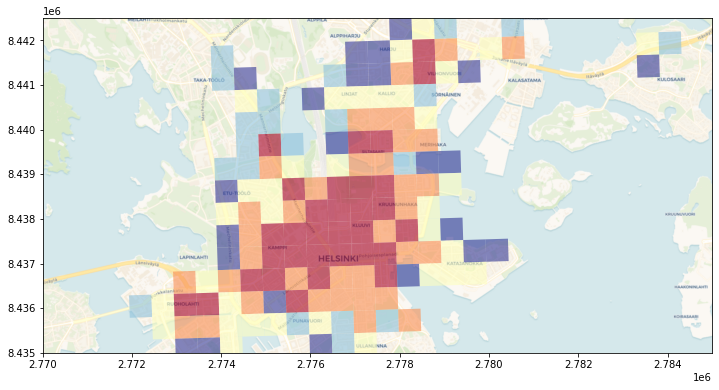

In [35]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# The formatting should follow: 'https://{s}.basemaps.cartocdn.com/{style}/{z}/{x}/{y}{scale}.png'
# Specify the style to use
style = "rastertiles/voyager"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)
    
# Add basemap with `OSM_A` style using zoom level of 14 
ctx.add_basemap(ax, zoom=14, attribution="", source=cartodb_url)

# Crop the figure
ax.set_xlim(2770000, 2785000)
ax.set_ylim(8435000, 8442500)


# Save the figure as png file with resolution of 600 dpi
outfp = "static_map_10.jpg"
plt.savefig(outfp, dpi=600)

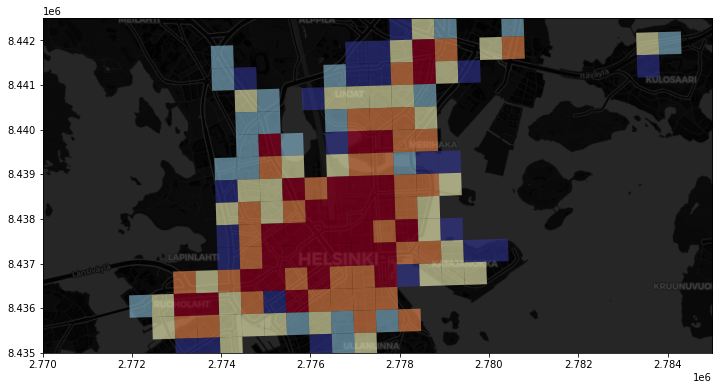

In [36]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# The formatting should follow: 'https://{s}.basemaps.cartocdn.com/{style}/{z}/{x}/{y}{r}.png'
# Specify the style to use
style = "dark_all"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)

# Add basemap with `OSM_A` style using zoom level of 14 
ctx.add_basemap(ax, zoom=13, attribution="", source=cartodb_url)

# Crop the figure
ax.set_xlim(2770000, 2785000)
ax.set_ylim(8435000, 8442500)

# Save the figure as png file with resolution of 600 dpi
outfp = "static_map_11.jpg"
plt.savefig(outfp, dpi=600)